### **Numerical Computing with NumPy**

In [1]:
w1, w2, w3 = 0.3, 0.2, 0.5
weights = [w1, w2, w3]
# region = [temp, rain, humitdity]
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

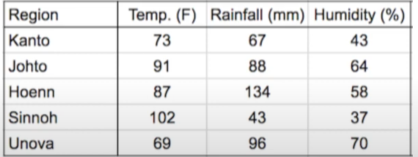

In [2]:
# yield = w1*temperature + w2*rainfall + w3*humidity
def crop_yield(region, weights):
  result = 0
  for x,w in zip(region, weights):
    result += x*w
  return result

In [3]:
crop_yield(kanto, weights)

56.8

In [4]:
crop_yield(hoenn, weights)

81.9

---

### **Python Lists & NumPy Arrays**

In [5]:
import numpy as np

In [6]:
kanto_np = np.array([73, 67, 43])
weights_np = np.array([w1,w2,w3])
kanto_np

array([73, 67, 43])

In [7]:
print(type(kanto_np))
print(type(weights_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
np.dot(kanto_np, weights_np) 
# this performs the dot product of two np_arrays

np.float64(56.8)

In [9]:
(kanto_np*weights_np).sum() 
# this first multiplies every corresponding element of 2 np_arrays and then sum them.

np.float64(56.8)

---
### **Benefits of NumPy Arrays**


In [10]:
# Python Lists
arr1 = list(range(1000000))
arr2 = list(range(1000000,2000000))

# NumPy Arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [11]:
%%time
result = 0
for x1,x2 in zip(arr1,arr2):
  result = x1*x2
result

CPU times: total: 31.2 ms
Wall time: 125 ms


1999997000001

In [12]:
%%time
result=0
np.dot(arr1_np,arr2_np)
result

CPU times: total: 0 ns
Wall time: 0 ns


0

---
### **Multi-dimensional NumPy Arrays**

In [13]:
climate_data = np.array([[73, 67, 43],
                         [91, 88, 64],
                         [87, 134, 58],
                         [102, 43, 37],
                         [69, 96, 70]])
print(climate_data)
print("dimensions of climate_data array are:",climate_data.shape) # dimension of array
print("data type of climate_data array is",climate_data.dtype)
weights_np.dtype

[[ 73  67  43]
 [ 91  88  64]
 [ 87 134  58]
 [102  43  37]
 [ 69  96  70]]
dimensions of climate_data array are: (5, 3)
data type of climate_data array is int64


dtype('float64')

In [14]:
result_np = np.matmul(climate_data,weights_np)
# result = (result_np).sum()
print(result_np)

[56.8 76.9 81.9 57.7 74.9]


In [15]:
climate_data @ weights_np 
# shortcut for matrix multiplication

array([56.8, 76.9, 81.9, 57.7, 74.9])

---
### **Working with CSV Data Files**

CSVs: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. 

In [16]:
import urllib.request
urllib.request.urlretrieve(
    'https://gist.githubusercontent.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv',
    'climate_data.txt'
)

('climate_data.txt', <http.client.HTTPMessage at 0x1a9b7f244a0>)

In [17]:
climate_data = np.genfromtxt('climate_data.txt', delimiter=',',skip_header=1)
# 'delimiter' is the type of character by which the data is seperated
# 'skip_header' is the number of rows in data to be skipped or not to be considered
print(climate_data)

[[25. 76. 99.]
 [39. 65. 70.]
 [59. 45. 77.]
 ...
 [99. 62. 58.]
 [70. 71. 91.]
 [92. 39. 76.]]


In [18]:
climate_data.shape # 10000 data rows with 3 columns

(10000, 3)

In [19]:
yields = climate_data @ weights_np
print(yields)
print(yields.shape) 

[72.2 59.7 65.2 ... 71.1 80.7 73.4]
(10000,)


In [20]:
climate_result = np.concatenate((climate_data, yields.reshape(10000,1)), axis=1)
print(climate_result)

[[25.  76.  99.  72.2]
 [39.  65.  70.  59.7]
 [59.  45.  77.  65.2]
 ...
 [99.  62.  58.  71.1]
 [70.  71.  91.  80.7]
 [92.  39.  76.  73.4]]


There are a couple of subtleties here:

* Since we wish to add new columns, we pass the argument `axis=1` to `np.concatenate`. The `axis` argument specifies the dimension for concatenation.

*  The arrays should have the same number of dimensions, and the same length along each except the dimension used for concatenation. We use the [`np.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) function to change the shape of `yields` from `(10000,)` to `(10000,1)`.

Here's a visual explanation of `np.concatenate` along `axis=1` (can you guess what `axis=0` results in?):

<img src="https://www.w3resource.com/w3r_images/python-numpy-image-exercise-58.png" width="300">



In [21]:
np.savetxt('climate_result.txt',
           climate_result,
           fmt='%.2f',
           header='temperatue, rainfall, humidity, yield')

* Mathematics: `np.sum`, `np.exp`, `np.round`, arithemtic operators 
* Array manipulation: `np.reshape`, `np.stack`, `np.concatenate`, `np.split`
* Linear Algebra: `np.matmul`, `np.dot`, `np.transpose`, `np.eigvals`
* Statistics: `np.mean`, `np.median`, `np.std`, `np.max`


---
### **Arithmetic Operations, Broadcasting, Comparison**

In [22]:
arr1 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])

In [23]:
arr2 = np.array([[11, 12, 13, 14], 
                 [15, 16, 17, 18], 
                 [19, 11, 12, 13]])

In [24]:
arr1 + 3

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12,  4,  5,  6]])

In [25]:
arr2-arr1

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [26]:
arr2/2

array([[5.5, 6. , 6.5, 7. ],
       [7.5, 8. , 8.5, 9. ],
       [9.5, 5.5, 6. , 6.5]])

In [27]:
arr1 * arr2

array([[ 11,  24,  39,  56],
       [ 75,  96, 119, 144],
       [171,  11,  24,  39]])

In [28]:
arr1 % 2

array([[1, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 1]])



#### **Array Broadcasting**

In [29]:
arr3 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])

In [30]:
arr4 = np.array([4, 5, 6, 7])

In [31]:
print(arr3.shape)
print(arr4.shape)

(3, 4)
(4,)


In [32]:
arr3 + arr4

array([[ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13,  6,  8, 10]])

When the expression `arr2 + arr4` is evaluated, `arr4` (which has the shape `(4,)`) is replicated three times to match the shape `(3, 4)` of `arr2`. Numpy performs the replication without actually creating three copies of the smaller dimension array, thus improving performance and using lower memory.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png" width="360">

Broadcasting only works if one of the arrays can be replicated to match the other array's shape.

#### **Array Comparison**

In [33]:
arr5 = np.array([[1, 2, 3], [3, 4, 5]])
arr6 = np.array([[2, 2, 3], [1, 2, 5]])

In [34]:
print(arr5==arr6)
print((arr5==arr6).dtype) 
# checks if corresponding elements are equal or not

[[False  True  True]
 [False False  True]]
bool


In [35]:
arr5!=arr6

array([[ True, False, False],
       [ True,  True, False]])

In [36]:
arr5>=arr6

array([[False,  True,  True],
       [ True,  True,  True]])

In [37]:
arr5<arr6

array([[ True, False, False],
       [False, False, False]])

In [38]:
print((arr5==arr6).sum())
# gives the number of elements which satsfies the condition

3


---
### **Array Indexing & Slicing**

In [39]:
arr3 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23],      
     [17, 18, 19.5, 43]]])

In [40]:
arr3.shape

(3, 2, 4)

In [41]:
# Single element
print(arr3[1,1,2])

36.0


In [42]:
# Subarray using ranges
print(arr3[1:, 0:1, :2])

[[[15. 16.]]

 [[98. 32.]]]


In [43]:
# Mixing indices & ranges
print(arr3[1:,1,3])

[18. 43.]


In [44]:
arr3[1]

array([[15., 16., 17., 21.],
       [63., 92., 36., 18.]])

In [45]:
arr3[:2,1]

array([[13., 14., 15., 19.],
       [63., 92., 36., 18.]])

#### **Other ways of creating Numpy arrays**



In [46]:
# All zeros
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [47]:
# All ones
np.ones([2, 2, 3])

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [48]:
# Identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [49]:
# Random vector
np.random.rand(5)

array([0.52944336, 0.54272015, 0.70607846, 0.92098715, 0.8132364 ])

In [50]:
# Random matrix
np.random.randn(2, 3) # rand vs. randn - what's the difference?

array([[-0.93667723,  1.2414112 , -0.76551268],
       [ 0.3947521 , -0.49463504, -1.74258195]])

In [51]:
# Fixed value
np.full([2, 3], 42)

array([[42, 42, 42],
       [42, 42, 42]])

In [52]:
# Range with start, end and step
np.arange(10, 90, 3)

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58,
       61, 64, 67, 70, 73, 76, 79, 82, 85, 88])

In [53]:
# Equally spaced numbers in a range
np.linspace(3, 27, 9)

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])